<a href="https://colab.research.google.com/github/hsin-you-wu/Image_processing/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation


In [ ]:
from PIL import Image
import io
import requests
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors

import random
from PIL import Image
import cv2

from pycocotools.coco import COCO
from pycocotools.mask import iou

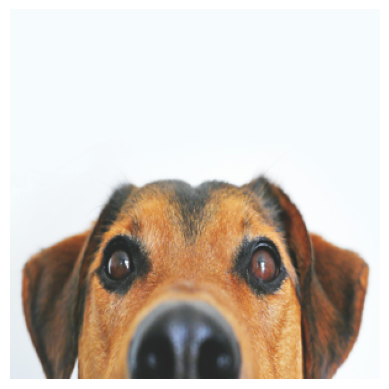

In [ ]:
# Fetch image

url = 'https://images.pexels.com/photos/406014/pexels-photo-406014.jpeg'
response = requests.get(url)

if response.status_code == 200:
    # Load image from response and resize it
    img = Image.open(io.BytesIO(response.content))
    img_resized = img.resize((300, 300))

    # Display the image
    plt.imshow(img_resized)
    plt.axis('off')
    plt.show()

    # Save the image
    img_resized.save('downloaded_image.jpg')
else:
    print(f"Failed to fetch url response. Status code: {response.status_code}")


# Threshold Segmentation



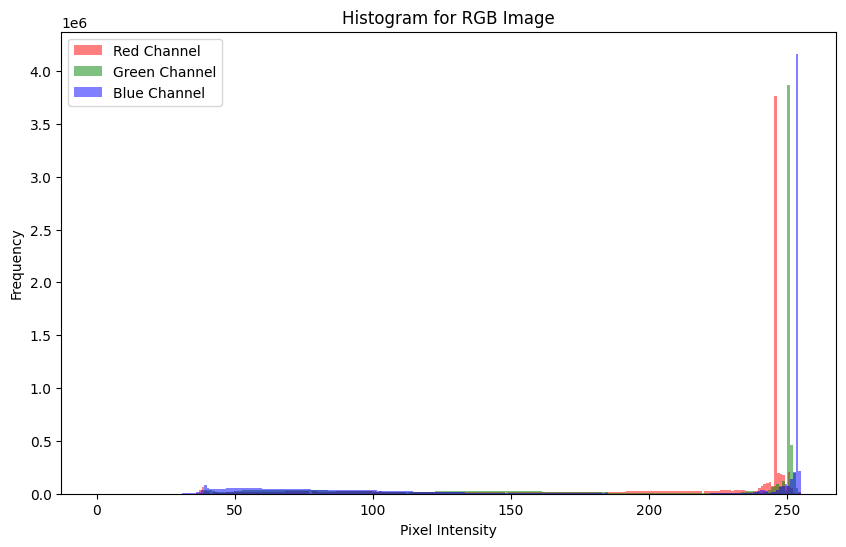

In [ ]:
# find threshold

image_array = np.array(img)

# Split the 3D array into three 1D arrays for each color channel (R, G, B)
red_channel = image_array[:, :, 0].flatten()
green_channel = image_array[:, :, 1].flatten()
blue_channel = image_array[:, :, 2].flatten()

# Create the histogram for each color channel
plt.figure(figsize=(10, 6))

# Red channel histogram
plt.hist(red_channel, bins=256, color='red', alpha=0.5, label='Red Channel')

# Green channel histogram
plt.hist(green_channel, bins=256, color='green', alpha=0.5, label='Green Channel')

# Blue channel histogram
plt.hist(blue_channel, bins=256, color='blue', alpha=0.5, label='Blue Channel')

# Add labels and legend
plt.title('Histogram for RGB Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Display the histogram
plt.show()

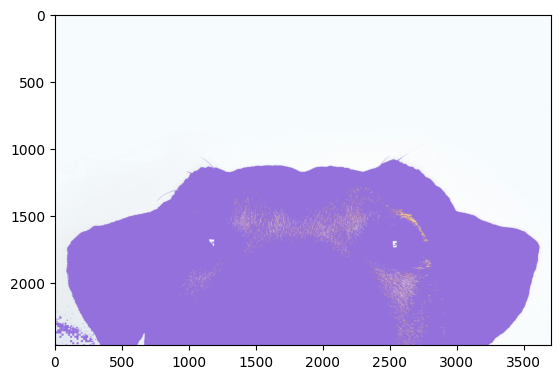

In [ ]:
color = [147,112,219]
threshold = 240

image_array[np.all(image_array < threshold, axis=-1)] = color
th_segmented_img = image_array
plt.imshow(th_segmented_img)


# K-Means Clustering + Threshold Segmentation



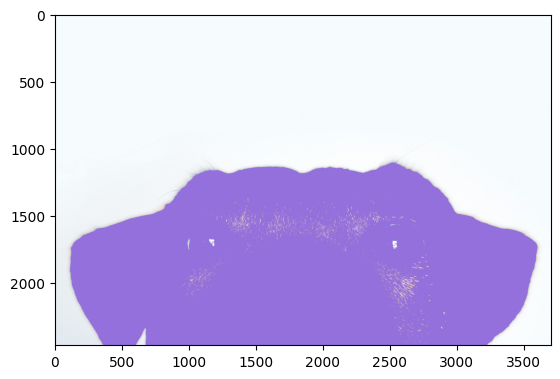

In [ ]:
image_array = np.array(img)
K = 3

vectorized = image_array.reshape((-1, 3))
vectorized = np.float32(vectorized)

# apply k-means clustering
kmeans = KMeans(n_clusters=K)
kmeans.fit(vectorized)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
low_intensity_clusters = np.where(np.all(cluster_centers < threshold, axis=1))[0]

# Reshape the labels to match the image array shape
labels = labels.reshape(image_array.shape[0], image_array.shape[1])

# Replace pixels that belong to the low-intensity clusters with the given color
for cluster in low_intensity_clusters:
    image_array[labels == cluster] = color

k_th_segmented_img = image_array
plt.imshow(k_th_segmented_img)

#Comparison (Original, Th, Th+K, Labeled)


In [ ]:
# reading in labeled img
labeled_img = Image.open('dog_labeled.jpg')
labeled_img.mode

labeled_img = np.array(labeled_img)
labeled_img[np.any(labeled_img >= threshold, axis=-1)] = [255, 255, 255]
labeled_img[np.any(labeled_img < threshold, axis=-1)] = [0, 0, 0]

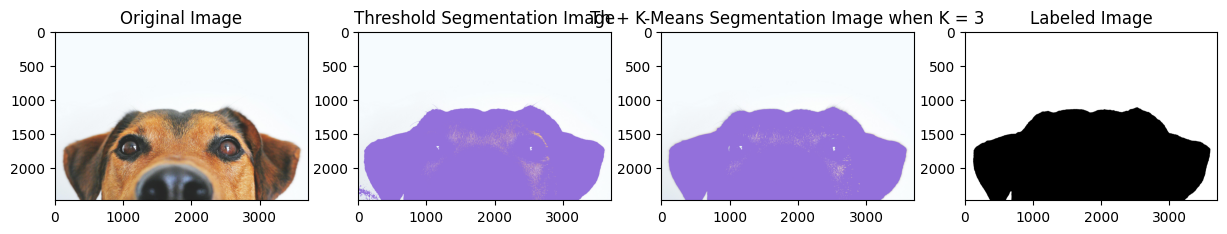

In [ ]:
figure_size = 15

plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,4,1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1,4,2)
plt.imshow(th_segmented_img)
plt.title('Threshold Segmentation Image')

plt.subplot(1,4,3)
plt.imshow(k_th_segmented_img)
plt.title('Th + K-Means Segmentation Image when K = %i' % K)

plt.subplot(1,4,4)
plt.imshow(labeled_img)
plt.title('Labeled Image')

plt.show()

## IoU Calculations

In [ ]:
def calculate_iou(predicted_mask, true_mask):
    # Ensure both masks have the same shape
    if predicted_mask.shape != true_mask.shape:
        raise ValueError("Mask shapes must match")

    # Calculate intersection and union using numpy
    intersection = np.sum(np.logical_and(predicted_mask, true_mask))
    union = np.sum(np.logical_or(predicted_mask, true_mask))

    # Calculate IoU by intersection / union
    if union == 0:
      return 0
    iou = intersection / union

    return iou

In [ ]:
# Calculate Simple IoU

# convert RGB to bool array
th_gray = cv2.cvtColor(th_segmented_img, cv2.COLOR_RGB2GRAY)
th_bool = (th_gray < threshold).astype(bool)

k_th_gray = cv2.cvtColor(k_th_segmented_img, cv2.COLOR_RGB2GRAY)
k_th_bool = (k_th_gray < threshold).astype(bool)

labeled_gray = cv2.cvtColor(labeled_img, cv2.COLOR_RGB2GRAY)
labeled_bool = (labeled_gray < threshold).astype(bool)

# print IoU results
print('IoU of threshold segmented image: ', calculate_iou(th_bool, labeled_bool))
print('IoU of k-means + threshold segmented image: ', calculate_iou(k_th_bool, labeled_bool))

IoU of threshold segmented image:  0.9350960815434695
IoU of k-means + threshold segmented image:  0.9350960815434695


**Q: Compare the performance with different TH and TH+K using IoU values**  
**A:** The two IoUs are exactly the same, indicating that the difference between the two segmentation procedure is so small that the small differences can simply be ignored.

# Practicing with a figure

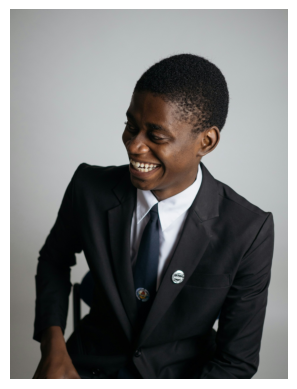

In [ ]:
# fetch image

url = 'https://images.unsplash.com/photo-1517598024396-46c53fb391a1?q=80&w=1935&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
response = requests.get(url)

if response.status_code == 200:
    # Load image
    img = Image.open(io.BytesIO(response.content))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to fetch url response. Status code: {response.status_code}")

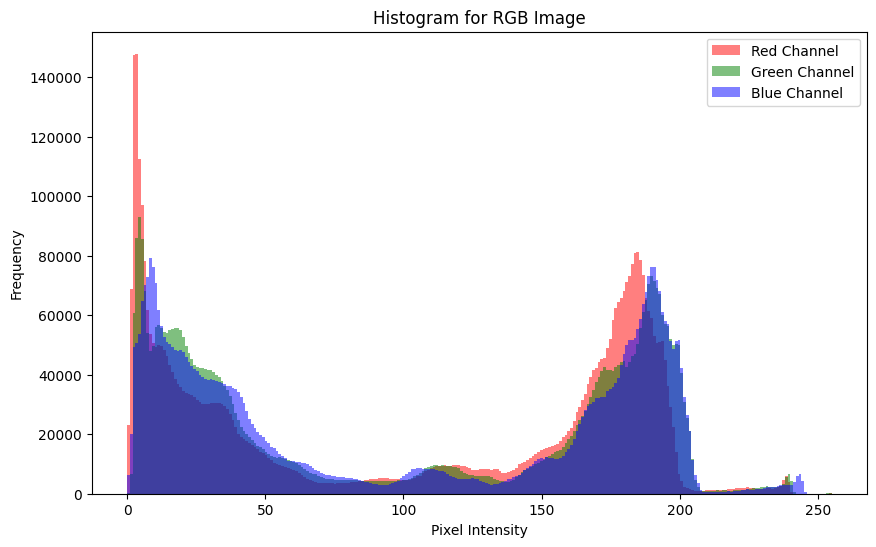

In [ ]:
# find threshold

image_array = np.array(img)

# Split the 3D array into three 1D arrays for each color channel (R, G, B)
red_channel = image_array[:, :, 0].flatten()
green_channel = image_array[:, :, 1].flatten()
blue_channel = image_array[:, :, 2].flatten()

# Create the histogram for each color channel
plt.figure(figsize=(10, 6))

# Red channel histogram
plt.hist(red_channel, bins=256, color='red', alpha=0.5, label='Red Channel')

# Green channel histogram
plt.hist(green_channel, bins=256, color='green', alpha=0.5, label='Green Channel')

# Blue channel histogram
plt.hist(blue_channel, bins=256, color='blue', alpha=0.5, label='Blue Channel')

# Add labels and legend
plt.title('Histogram for RGB Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Display the histogram
plt.show()

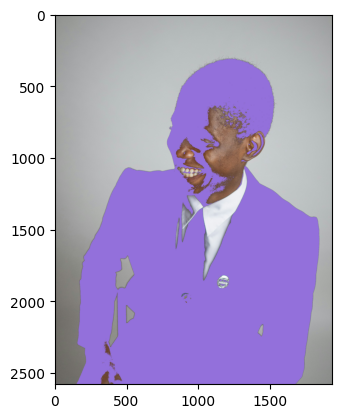

In [ ]:
# apply threshold segmentation

color = [147,112,219]
threshold = 100

image_array[np.all(image_array < threshold, axis=-1)] = color
th_segmented_img = image_array
plt.imshow(th_segmented_img)

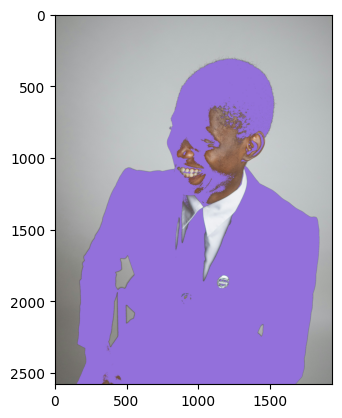

In [ ]:
# applying k-means + threshold

image_array = np.array(img)
K = 10

vectorized = image_array.reshape((-1, 3))
vectorized = np.float32(vectorized)

# apply k-means clustering
kmeans = KMeans(n_clusters=K)
kmeans.fit(vectorized)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
low_intensity_clusters = np.where(np.all(cluster_centers < threshold, axis=1))[0]

# Reshape the labels to match the image array shape
labels = labels.reshape(image_array.shape[0], image_array.shape[1])

# Replace pixels that belong to the low-intensity clusters with the given color
for cluster in low_intensity_clusters:
    image_array[labels == cluster] = color

k_th_segmented_img = image_array
plt.imshow(k_th_segmented_img)

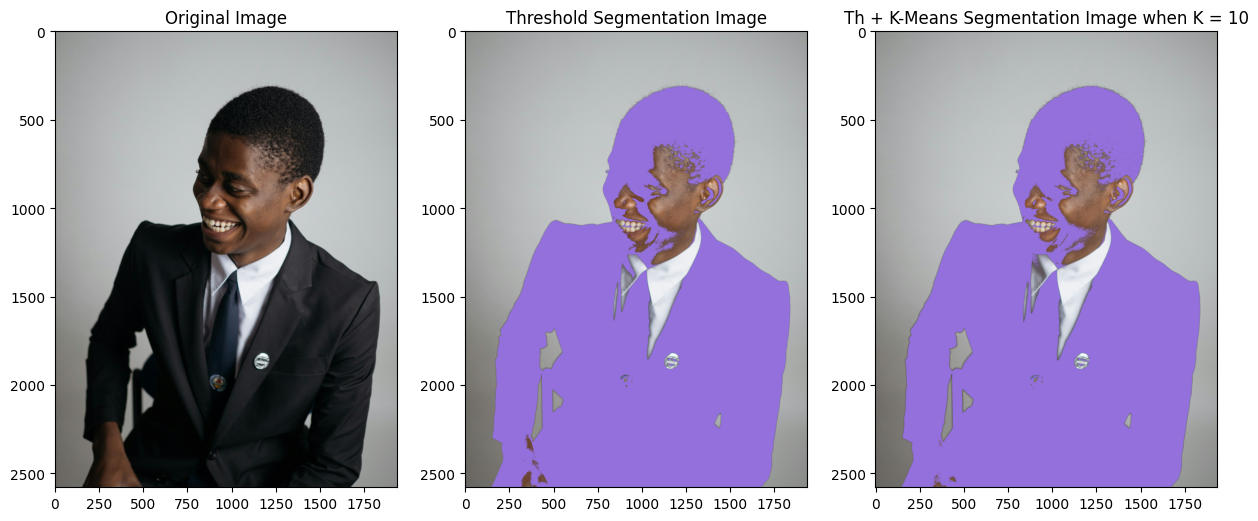

In [ ]:
# Comparison

figure_size = 15

plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(th_segmented_img)
plt.title('Threshold Segmentation Image')

plt.subplot(1,3,3)
plt.imshow(k_th_segmented_img)
plt.title('Th + K-Means Segmentation Image when K = %i' % K)

plt.show()

**Q: Compare the performance with different TH and TH+K by using a figure as practice.**  
**A:** With a focus on the bottom-left of the two images, we see that the image using threshold segmentation covers more of the hand of the man, comparing to the image using k-means + threshold segmentation, indicating that threshold-segmentation is a better procedure in this case.

# Practicing with a figure (grayscale / color)

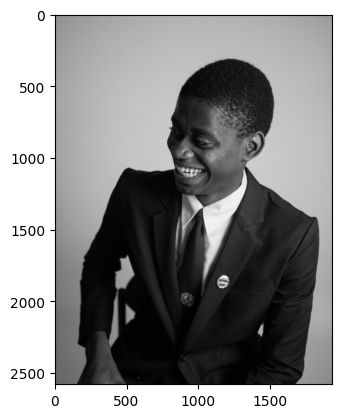

In [ ]:
# convert RGB image to grayscale
img = np.array(img)
gray_img_2D = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img = np.stack((gray_img_2D,)*3, axis=-1)

plt.imshow(gray_img)

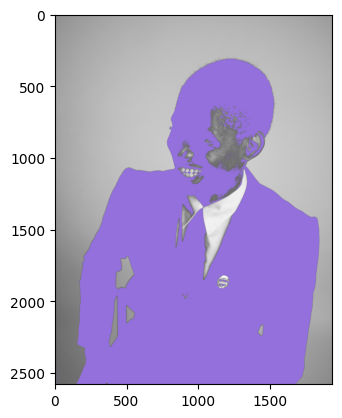

In [ ]:
# apply threshold segmentation

color = [147,112,219]
threshold = 100

gray_img[np.all(gray_img < threshold, axis=-1)] = color
th_segmented_img = gray_img
plt.imshow(th_segmented_img)

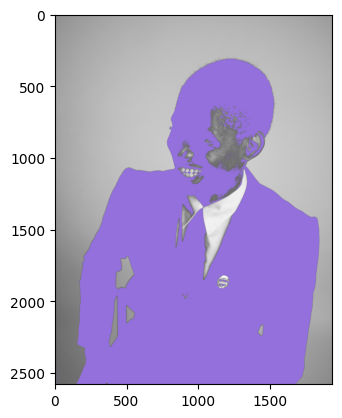

In [ ]:
# applying k-means + threshold

image_array = np.array(gray_img)
K = 10

vectorized = image_array.reshape((-1, 3))
vectorized = np.float32(vectorized)

# apply k-means clustering
kmeans = KMeans(n_clusters=K)
kmeans.fit(vectorized)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
low_intensity_clusters = np.where(np.all(cluster_centers < threshold, axis=1))[0]

# Reshape the labels to match the image array shape
labels = labels.reshape(image_array.shape[0], image_array.shape[1])

# Replace pixels that belong to the low-intensity clusters with the given color
for cluster in low_intensity_clusters:
    image_array[labels == cluster] = color

k_th_segmented_img = image_array
plt.imshow(k_th_segmented_img)

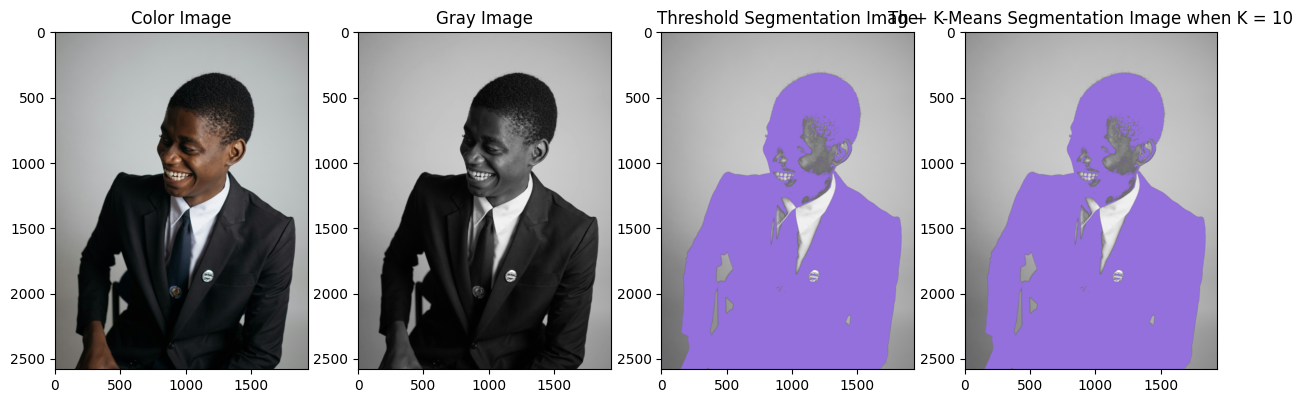

In [ ]:
# Comparison

figure_size = 15

plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,4,1)
plt.imshow(img)
plt.title('Color Image')

plt.subplot(1,4,2)
plt.imshow(gray_img_2D, cmap='gray')
plt.title('Gray Image')

plt.subplot(1,4,3)
plt.imshow(th_segmented_img)
plt.title('Threshold Segmentation Image')

plt.subplot(1,4,4)
plt.imshow(k_th_segmented_img)
plt.title('Th + K-Means Segmentation Image when K = %i' % K)

plt.show()

**Q: Compare the performance with different TH and TH+K, using a gray image and a colorful image, with a figure as the practice.**  
**A:** They are basically the same.


# Practicing with COCO Dataset & YOLO


## Preperation

In [ ]:
# download dataset
import kagglehub
path = kagglehub.dataset_download("jeffaudi/coco-2014-dataset-for-yolov3")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jeffaudi/coco-2014-dataset-for-yolov3/versions/4


In [ ]:
# install necessary packages
!pip install pycocotools

In [ ]:
# load dataset
dataDir='/root/.cache/kagglehub/datasets/jeffaudi/coco-2014-dataset-for-yolov3/versions/4/coco2014/'
dataType='val2014'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType) # label
imageDir = '{}/images/{}/'.format(dataDir, dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=20.65s)
creating index...
index created!


## Select 3 categories randomly


In [ ]:
# select 3 cats randomly
cat_ids = coco.getCatIds()
random_cat_ids = random.sample(cat_ids, 3)
random_cat_names = [coco.loadCats(cat_id)[0]["name"] for cat_id in random_cat_ids]

In [ ]:
def getCocoImg(img_id):
  # Retrieve image file path
  image_info = coco.loadImgs(img_id)[0]
  image_dir = os.path.join(dataDir, 'images', 'val2014')
  image_path = os.path.join(image_dir, image_info['file_name'])

  # Load the main image
  image_rgb = Image.open(image_path)
  return image_rgb

In [ ]:
def getMasks(image_id, cat_name):
  annotation_ids = coco.getAnnIds(imgIds=image_id)
  annotations = coco.loadAnns(annotation_ids)
  mask = coco.annToMask(annotations[0])

  # Retrieve image dimensions
  image_info = coco.loadImgs(image_id)[0]
  height, width = image_info['height'], image_info['width']
  groundtruth_mask = np.zeros((height, width), dtype=np.uint8)
  selected_mask = np.zeros((height, width), dtype=np.uint8)

  # Iterate through the annotations and draw the binary masks
  for annotation in annotations:
      category_id = annotation['category_id']
      category_name = coco.loadCats(category_id)[0]['name']
      if category_name == cat_name:
          mask = coco.annToMask(annotation)
          # Overlap masks
          selected_mask += mask

  for i in range(len(annotations)):
    groundtruth_mask += coco.annToMask(annotations[i])

  return selected_mask, groundtruth_mask

In [ ]:
def calculate_iou(predicted_mask, true_mask):
    # Ensure both masks have the same shape
    if predicted_mask.shape != true_mask.shape:
        raise ValueError("Mask shapes must match")

    # Step1: Calculate intersection and union using numpy
    intersection = np.logical_and(predicted_mask, true_mask)
    union = np.logical_or(predicted_mask, true_mask)

    # Step2: Calculate IoU by intersection / union
    iou = np.sum(intersection) / np.sum(union)

    return iou

In [ ]:
# get all imgs from the 3 cats
cat_img_dict = {}
for cat_name in random_cat_names:
  cat_ids = coco.getCatIds(catNms=cat_name)
  img_ids = coco.getImgIds(catIds=cat_ids)
  cat_img_dict[cat_name] = img_ids
print(cat_img_dict)

{'baseball glove': [63488, 514049, 352259, 468997, 567304, 223243, 456725, 73749, 395291, 188445, 159774, 522273, 526371, 282659, 397352, 436264, 305195, 434219, 487469, 475182, 131115, 374829, 188465, 36911, 305206, 51258, 290875, 18491, 206907, 208955, 84031, 417854, 417857, 362563, 331844, 153669, 409667, 505934, 102478, 518224, 292944, 231508, 389205, 444502, 378970, 202843, 229468, 223326, 301155, 514147, 237669, 348263, 485480, 16491, 247917, 526446, 321647, 180336, 555131, 292990, 63617, 102532, 446597, 213132, 299148, 323726, 170127, 192656, 452759, 239773, 192670, 125085, 243875, 463013, 207019, 53420, 202923, 497838, 469165, 389295, 305329, 213171, 569526, 121014, 561336, 231610, 264382, 276673, 266434, 153797, 567494, 73927, 217285, 10442, 131280, 334034, 424147, 542933, 94422, 456917, 211163, 403675, 229601, 407783, 264424, 35049, 176362, 440554, 209130, 78061, 538858, 561386, 379120, 180463, 473323, 559348, 479477, 237814, 383223, 8443, 334075, 18688, 483587, 413955, 65798

In [ ]:
iou_scores = []
for cat_name in cat_img_dict:
  for img_id in cat_img_dict[cat_name]:
    # get selected mask and groundtruth mask
    selected_mask, groundtruth_mask = getMasks(img_id, cat_name)
    # calculate iou
    iou = calculate_iou(np.array(selected_mask), np.array(groundtruth_mask))
    iou_scores.append(iou)
print(iou_scores)

[0.0010401768300611104, 0.000523979475822796, 0.03292418439389045, 0.00184639560007857, 0.03459061637534499, 0.054880735099754545, 0.01831572997986506, 0.004927814181450109, 0.013876146788990826, 0.022095087788518444, 0.01410332541567696, 0.03924118897313073, 0.01652113437910517, 0.0038429375452179388, 0.04654965660089393, 0.01868827484765707, 0.05871576440414033, 0.02729542835190165, 0.018714894634107478, 0.010706433419367173, 0.006211356287934653, 0.00449570197336466, 0.0005827046947099863, 0.028310228313386174, 0.005715540536419034, 0.021089554824181535, 0.02659621119101912, 0.01374447621523265, 0.02103310004732136, 0.0044691647150663545, 0.015208955889567817, 0.01483099943721654, 0.016698578474035393, 0.04843642883509993, 0.05287232611327862, 0.007838654364334122, 0.06943197462141618, 0.0011833749578594674, 0.027338895792650454, 0.03046030393274028, 0.0056828597616865265, 0.009781985083189903, 0.011308861698183166, 0.033165521062994446, 0.05871748647952614, 0.005928108591218858, 0.

In [ ]:
# calculate avg iou
avg_iou = np.mean(iou_scores)
print(avg_iou)

0.4406729242404941


## Finding optimal k and threshold

In [ ]:
def k_th_segmentation(img_jpg, k, th):
    color = [147, 112, 219]
    background_color = [0, 0, 0]

    # Convert the input image to an array
    image_array = np.array(img_jpg)

    # Turn grayscale to RGB if necessary
    if img_jpg.mode == 'L':
        image_array = np.stack((image_array,) * 3, axis=-1)

    # Vectorize the image array for k-means clustering
    vectorized = image_array.reshape((-1, 3)).astype(np.float32)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vectorized)

    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Identify low-intensity clusters based on threshold
    low_intensity_clusters = np.where(np.all(cluster_centers < th, axis=-1))[0]

    # Reshape labels to match the image array shape
    labels = labels.reshape(image_array.shape[:2])

    # Create a mask for the segmented object
    mask = np.isin(labels, low_intensity_clusters)

    # Create a new image with a white background
    background = np.full_like(image_array, background_color)

    # Overlay the segmented object onto the white background
    background[mask] = color

    # Convert the result back to an image
    result_image = Image.fromarray(background.astype(np.uint8))

    return result_image

In [ ]:
iou_list_50, iou_list_100, iou_list_150, iou_list_200 = [], [], [], []
k_list = list(range(3, 31))

for th in [50, 100, 150, 200]:
  for k in k_list:
    # use the first img
    cat_name = list(cat_img_dict.keys())[0]
    img_id = cat_img_dict[cat_name][0]

    # get img
    img_jpg = getCocoImg(img_id)

    # perform k-th segmentation
    k_th_segmented_img = k_th_segmentation(img_jpg, k, th)
    gray_k_th_segmented_img = cv2.cvtColor(np.array(k_th_segmented_img), cv2.COLOR_RGB2GRAY)

    # calculate iou
    _, groundtruth_mask = getMasks(img_id, cat_name)
    iou = calculate_iou(np.array(gray_k_th_segmented_img), np.array(groundtruth_mask))

    # store results into lists
    if th == 50:
        iou_list_50.append(iou)
    elif th == 100:
        iou_list_100.append(iou)
    elif th == 150:
        iou_list_150.append(iou)
    elif th == 200:
        iou_list_200.append(iou)

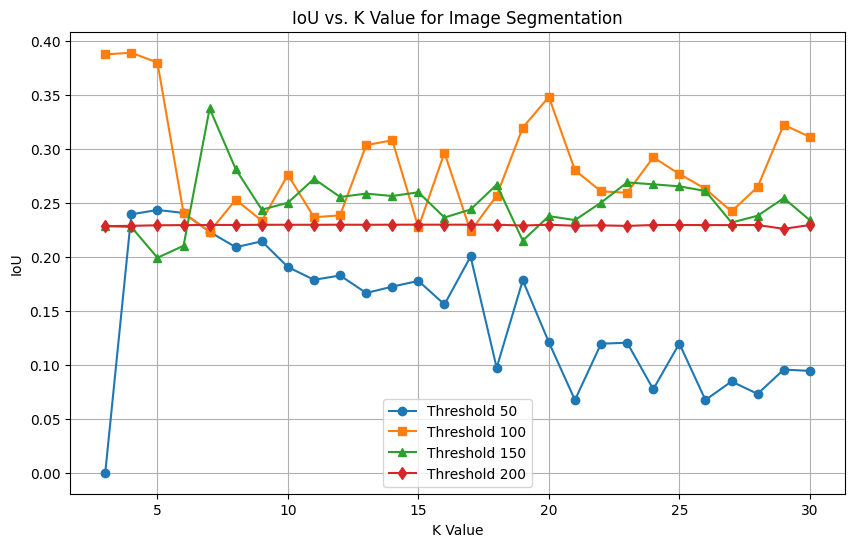

In [ ]:
# visualize results

# create plot
plt.figure(figsize=(10, 6))

# plot lines for each threshold
plt.plot(k_list, iou_list_50, label='Threshold 50', marker='o')
plt.plot(k_list, iou_list_100, label='Threshold 100', marker='s')
plt.plot(k_list, iou_list_150, label='Threshold 150', marker='^')
plt.plot(k_list, iou_list_200, label='Threshold 200', marker='d')

# Customize the plot
plt.xlabel('K Value')
plt.ylabel('IoU')
plt.title('IoU vs. K Value for Image Segmentation')
plt.legend()
plt.grid(True)


plt.show()

So, we see that the optimal k is 3, and the optimal th is 100.

## Comparing YOLO with k-th segmentation

In [ ]:
!pip install ultralytics -q

In [ ]:
from ultralytics import YOLO
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [ ]:
def yolo_segmentation(img_id, model):

  image_info = coco.loadImgs(img_id)[0]
  height, width = image_info['height'], image_info['width']
  yolo11_masks = np.zeros((height, width), dtype=np.float32)

  # Perform inference on an image
  img_file_name = coco.loadImgs(img_id)[0]['file_name']
  img_path = os.path.join(base_path, img_file_name)
  img_rgb = Image.open(img_path)
  results = model(img_rgb)

  # Iterate through the results to get masks and class names
  for result in results:
      masks = result.masks.data  # Segmentation masks
      class_indices = result.boxes.cls  # Class indices for each mask # label

      for i, (mask, class_idx) in enumerate(zip(masks, class_indices)):

          # Resize the mask to the original image size, if needed
          resized_mask = cv2.resize(mask.cpu().numpy(), (width, height))

          # step 5: overlap masks onto yolo11_masks, and visualize it
          yolo11_masks += resized_mask

  return yolo11_masks

In [ ]:
model = YOLO("yolo11n-seg.pt")
base_path = "/root/.cache/kagglehub/datasets/jeffaudi/coco-2014-dataset-for-yolov3/versions/4/coco2014/images/val2014/"  # Path to your images folder

In [ ]:
k = 3 # optimal k
th = 100 # optimal th
k_th_iou_scores = []
yolo_iou_scores = []

cat_name = list(cat_img_dict.keys())[0] # use the first cat

for img_id in cat_img_dict[cat_name]:
  img_jpg = getCocoImg(img_id)
  _, groundtruth_mask = getMasks(img_id, cat_name)

  # perform k-th segmentation and get iou
  k_th_segmented_img = k_th_segmentation(img_jpg, k, th)
  gray_k_th_segmented_img = cv2.cvtColor(np.array(k_th_segmented_img), cv2.COLOR_RGB2GRAY)
  iou = calculate_iou(np.array(gray_k_th_segmented_img), np.array(groundtruth_mask))
  k_th_iou_scores.append(iou)

  # perform Yolo segmentation and get iou
  yolo_segmentation_mask = yolo_segmentation(img_id, model)
  if yolo_segmentation_mask is not None:
    iou2 = calculate_iou(np.array(yolo_segmentation_mask), np.array(groundtruth_mask))
    yolo_iou_scores.append(iou2)

# compare avg iou
k_th_avg_iou = np.mean(k_th_iou_scores)
yolo_avg_iou = np.mean(yolo_iou_scores)
print("k-th segmentation average iou: ", k_th_avg_iou)
print("yolo segmentation average iou: ", yolo_avg_iou)


0: 448x640 2 persons, 2 baseball bats, 220.8ms
Speed: 2.6ms preprocess, 220.8ms inference, 12.4ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 5 persons, 236.6ms
Speed: 2.1ms preprocess, 236.6ms inference, 15.5ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 5 persons, 1 baseball bat, 1 baseball glove, 223.1ms
Speed: 2.2ms preprocess, 223.1ms inference, 18.8ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 8 persons, 226.0ms
Speed: 2.1ms preprocess, 226.0ms inference, 25.8ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 3 persons, 232.5ms
Speed: 2.0ms preprocess, 232.5ms inference, 15.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 1 baseball glove, 231.2ms
Speed: 2.5ms preprocess, 231.2ms inference, 8.7ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 5 persons, 1 baseball bat, 1 baseball glove, 238.9ms
Speed: 2.9ms preprocess, 238.9ms inference, 21.2ms postprocess per image at shape (1, 3,

**Result:**  
k-th segmentation average iou:  0.21424738624078954  
yolo segmentation average iou:  0.6971173369298068

So, we see that yolo segmentation has a higher average iou socre.

## Visualization and analysis

In [ ]:
# use the first img
cat_name = list(cat_img_dict.keys())[0]
img_id = cat_img_dict[cat_name][0]

# original image
original_img = getCocoImg(img_id)

# k-th seg image
k = 3
th = 100
k_th_seg_img = k_th_segmentation(original_img, k, th)

# yolo seg image
yolo_seg_img = yolo_segmentation(img_id, model)

# groundtruth image
_, groundtruth_img = getMasks(img_id, cat_name)


0: 448x640 2 persons, 2 baseball bats, 320.1ms
Speed: 2.8ms preprocess, 320.1ms inference, 20.4ms postprocess per image at shape (1, 3, 448, 640)


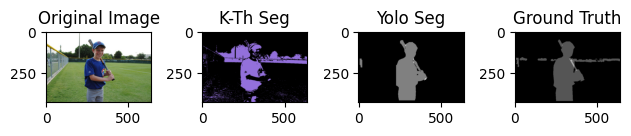

In [ ]:
# visiualize
plt.subplot(1,4,1)
plt.imshow(original_img)
plt.title('Original Image')

plt.subplot(1,4,2)
plt.imshow(k_th_seg_img, cmap='gray')
plt.title('K-Th Seg')

plt.subplot(1, 4, 3)
plt.imshow(yolo_seg_img, cmap='gray')
plt.title('Yolo Seg')

plt.subplot(1, 4, 4)
plt.imshow(groundtruth_img, cmap='gray')
plt.title('Ground Truth')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

###**Analysis**  
We can evaluate the segmentation results in two ways:


---



**1. Subjectively**  
Simply by observing the images displayed in the chart above, it’s clear that YOLO segmentation provides the best performance, even surpassing the ground truth. YOLO accurately segments the baseball player with distinct outlines, only mistakenly including a small portion of the background (the fences) on the left side. In contrast, the ground truth segmentation mistakenly includes a horizontal line of grass in the background.  
    
K-th segmentation, on the other hand, performs the worst, as it includes a significant portion of the background and fails to segment the entire baseball player, excluding his skin and pants.  


---


  
**2. Objectively**  
To quantify the performance, we can look at the average Intersection over Union (IoU) for each segmentation method. Recall from Problem 3, we obtained the following results:  

  * K-th segmentation average IoU: 0.214  
  * YOLO segmentation average IoU: 0.697  

With a higher average IoU score of 0.697, YOLO clearly outperforms K-th segmentation. This superior performance is due to YOLO’s ability to analyze context and object boundaries using convolutional neural networks (CNNs), which helps it segment objects based on learned features rather than static color thresholds. K-th segmentation, on the other hand, relies on simple color thresholds, which limits its effectiveness in colorful images with complex pixel variations. In images like these, setting an optimal threshold to isolate the target object from the background becomes challenging, leading to imprecise segmentations.

